In [10]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

### Read data 

In [15]:
languages = !ls 'hurst_values/'
languages.remove('pairs')
languages.remove('images')
print languages

['bulgarian(ru).txt', 'croatian(hr).txt', 'czech(cs).txt', 'danish(da).txt', 'dutch(en).txt', 'english(en).txt', 'french(fr).txt', 'german(de).txt', 'italian(it).txt', 'norwegian(da).txt', 'polish(pl).txt', 'romanian(ro).txt', 'serbian(sr).txt', 'spanish(es).txt', 'swedish(sv).txt']


In [6]:
values = {}
for lang in languages:
    name = lang[:-8]
    values[name] = np.loadtxt("hurst_values/" + lang, dtype=np.float64)

### Draw single languages

#### All languages

In [8]:
import scipy.stats as stats

def fit(lang_array):
    fit_values = stats.norm.pdf(lang_array, np.mean(lang_array), np.std(lang_array))
    return fit_values

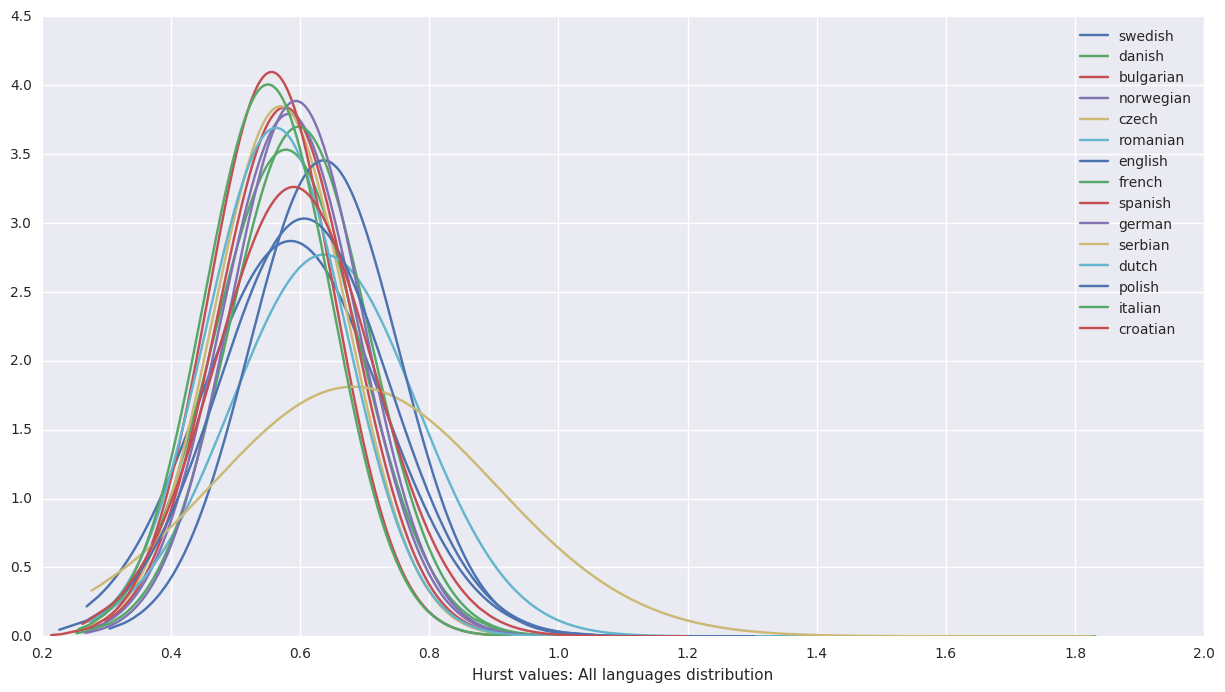

In [42]:
plt.figure(figsize=(15, 8))
plt.xlabel('Hurst values: All languages distribution')
for lang in values:
    sorted_data = sorted(values[lang])
    plt.plot(sorted_data, fit(sorted_data), label=lang)
plt.legend()
plt.savefig('hurst_values/images/all_single.png')
plt.show()

#### Slavic group, western subgroup

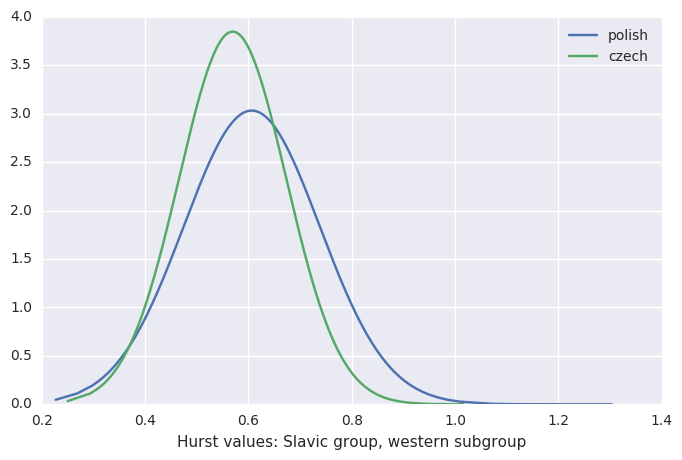

In [41]:
plt.figure(figsize=(8, 5))
plt.xlabel('Hurst values: Slavic group, western subgroup')
for lang in ['polish', 'czech']:
    sorted_data = sorted(values[lang])
    plt.plot(sorted_data, fit(sorted_data), label=lang)
plt.legend()
plt.savefig('hurst_values/images/slavic_western.png')
plt.show()

#### Slavic group, southern subgroup 

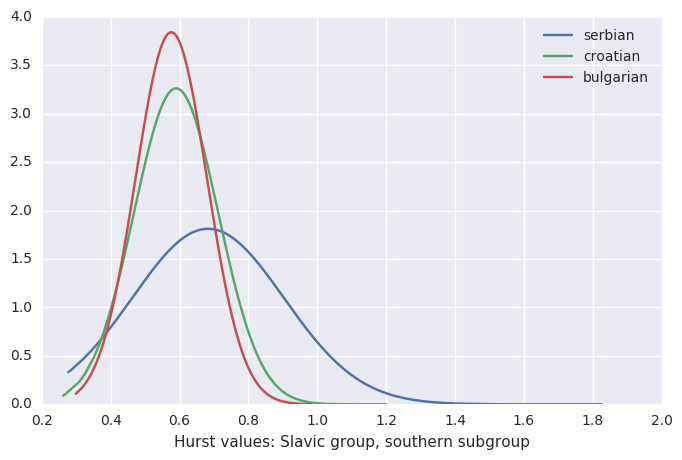

In [43]:
plt.figure(figsize=(8, 5))
plt.xlabel('Hurst values: Slavic group, southern subgroup')
for lang in ['serbian', 'croatian', 'bulgarian']:
    sorted_data = sorted(values[lang])
    plt.plot(sorted_data, fit(sorted_data), label=lang)
plt.legend()
plt.savefig('hurst_values/images/slavic_southern.png')
plt.show()

#### German group, northern subgroup 

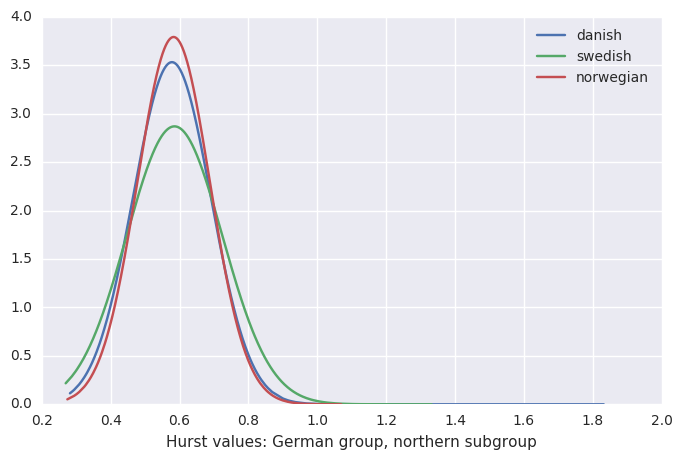

In [45]:
plt.figure(figsize=(8, 5))
plt.xlabel('Hurst values: German group, northern subgroup')
for lang in ['danish', 'swedish', 'norwegian']:
    sorted_data = sorted(values[lang])
    plt.plot(sorted_data, fit(sorted_data), label=lang)
plt.legend()
plt.savefig('hurst_values/images/german_northern.png')
plt.show()

#### German group, western subgroup: 

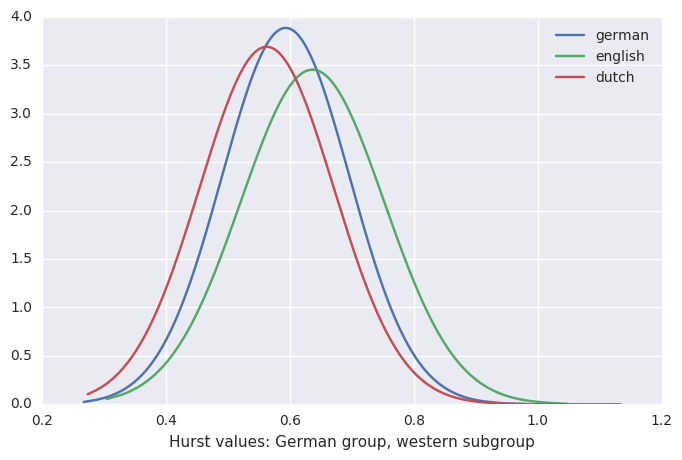

In [46]:
plt.figure(figsize=(8, 5))
plt.xlabel('Hurst values: German group, western subgroup')
for lang in ['german', 'english', 'dutch']:
    sorted_data = sorted(values[lang])
    plt.plot(sorted_data, fit(sorted_data), label=lang)
plt.legend()
plt.savefig('hurst_values/images/german_western.png')
plt.show()

#### Romanic group 

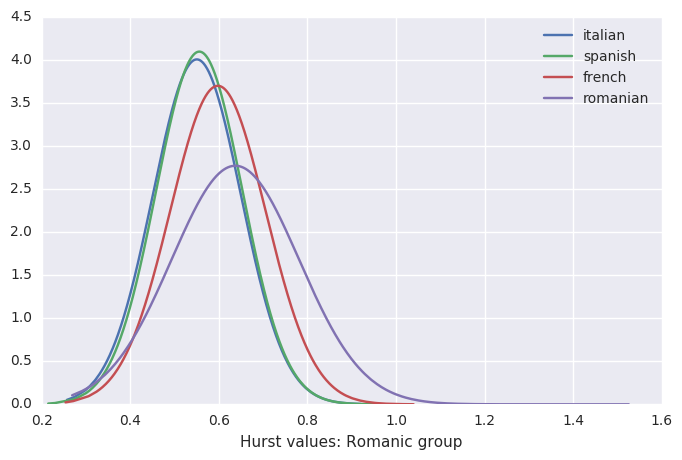

In [47]:
plt.figure(figsize=(8, 5))
plt.xlabel('Hurst values: Romanic group')
for lang in ['italian', 'spanish', 'french', 'romanian']:
    sorted_data = sorted(values[lang])
    plt.plot(sorted_data, fit(sorted_data), label=lang)
plt.legend()
plt.savefig('hurst_values/images/romanic.png')
plt.show()

### Draw merged languages

In [17]:
len(languages)

15

In [18]:
paired_languages = !ls 'hurst_values/pairs/'

In [23]:
ts = "croatian_bulgarian.txt"
ts[:-4].split('_')

['croatian', 'bulgarian']

In [56]:
for langtxt in languages:
    lang = langtxt[:-8]

    for plangs in paired_languages:
        lang_1_2 = plangs[:-4].split('_')
        lang_2 = lang_1_2[1] if lang_1_2[1] != lang else lang_1_2[0]

        if lang in plangs:
            lang_data = np.loadtxt("hurst_values/pairs/" + plangs, dtype=np.float64)
            lang_data = lang_data[~np.isnan(lang_data)]
            plt.figure(figsize=(8, 5))
            plt.xlabel('Two-languages mixture distribution: ' + lang + ' and ' + lang_2)
            plt.hist(lang_data, bins=40)
            plt.savefig('hurst_values/images/pairs/' + lang + '/' + lang + '_' + lang_2 + '.png')
            plt.close()